# San Francisco Crime Data Exploration
### Keenan Zucker and Joe Sutker


We are going to explore our dataset by doing some visualization and such. We will start by importing packages we will be using for visualization and reading the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will import the training data set to explore using the csv reader from pandas and using the head function to print out the first five rows, to see what some of the data looks like!

In [4]:
crime_train = pd.read_csv("./train.csv" )

print crime_train.head()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

Immediately, we can see that this dataset is going to be complicated because only the latitude and longitude (and time of occurance) are numerical values. We will have to be clever in how to compare different catagories that are not simply numbers. 

In [5]:
print crime_train["DayOfWeek"].unique() 

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


This is reassuring, that there are only 7 days in the week!

In [6]:
print crime_train["Category"].unique()

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


This is going to be more complicated, since there are 39 different catagories of crime. Computing this will be a difficult task since we might have to turn these catagories into numerical values, which could be difficult. 

In [7]:
print crime_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


This is also pretty convinient! The dataset is actually complete and has no null values. This seems pretty rare for a dataset, but makes life easier on us since we will not have to add in values that could potentially change the accuracy of our predictions later.

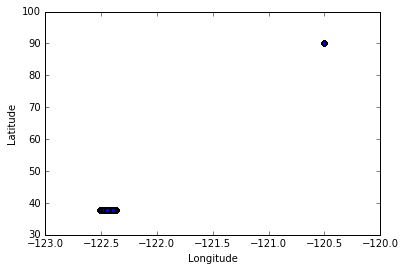

In [8]:
plt.scatter(crime_train.X, crime_train.Y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

As seen, there is a clear outlier in the mix, somewhere on the other side of the world it looks like!

In [9]:
print type(crime_train)

<class 'pandas.core.frame.DataFrame'>


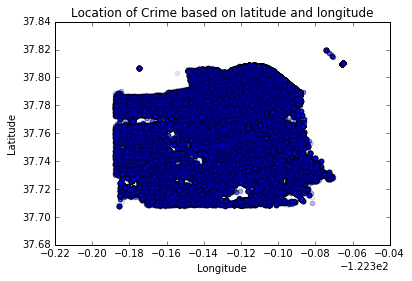

In [18]:
crime_train = crime_train[np.abs(crime_train.X-crime_train.X.mean())<=(3*crime_train.X.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crime_train = crime_train[np.abs(crime_train.Y-crime_train.Y.mean())<=(3*crime_train.Y.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

plt.scatter(crime_train.X, crime_train.Y, alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of Crime based on latitude and longitude")
plt.show()

When we do some cleaning up of the longitude and latitude, that is, removing the outliers by dropping all the values that are more that 3 standard deviations away from the average, we are left with a graph that is more revealing. We sure do have a lot of data points!

In [23]:
print crime_train["DayOfWeek"].value_counts()

Friday       129782
Wednesday    125471
Saturday     123295
Thursday     121397
Tuesday      121216
Monday       117949
Sunday       113417
Name: DayOfWeek, dtype: int64


As shown, there is a clear different of when crimes are most likely to happen, as friday is the most popular day, and sunday is the least popular day for crimes to occur!